In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot8DimsNS_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [7]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDimsNSLessData/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                print(mses_full)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

           bw        mse
45  39.810717  52.617947
          bw        mse
29  0.891251  49.155258
          bw          mse
17  0.031749  1642.236572
         bw          mse
6  0.001493  2098.315186
            bw        mse
51  251.188643  52.619869
             bw        mse
57  3981.071706  52.619923
         bw        mse
31  1.44544  51.204449
         bw          mse
7  0.001972  2097.484863
             bw        mse
58  6309.573445  52.619923
         bw        mse
37  6.16595  52.537834
          bw         mse
14  0.013793  2011.01416
         bw          mse
2  0.000491  2099.233398
          bw        mse
23  0.168214  30.343458
         bw         mse
21  0.09649  154.837814
         bw          mse
9  0.003437  2093.804443
          bw          mse
11  0.005992  2082.338135
           bw        mse
47  63.095734  52.619141
           bw        mse
46  50.118723  52.618675
         bw          mse
4  0.000857  2099.030762
          bw        mse
26  0.387196  39.219193
  

Text(0.5, 1.0, 'Minimum MSE is (29.183222, 24)')

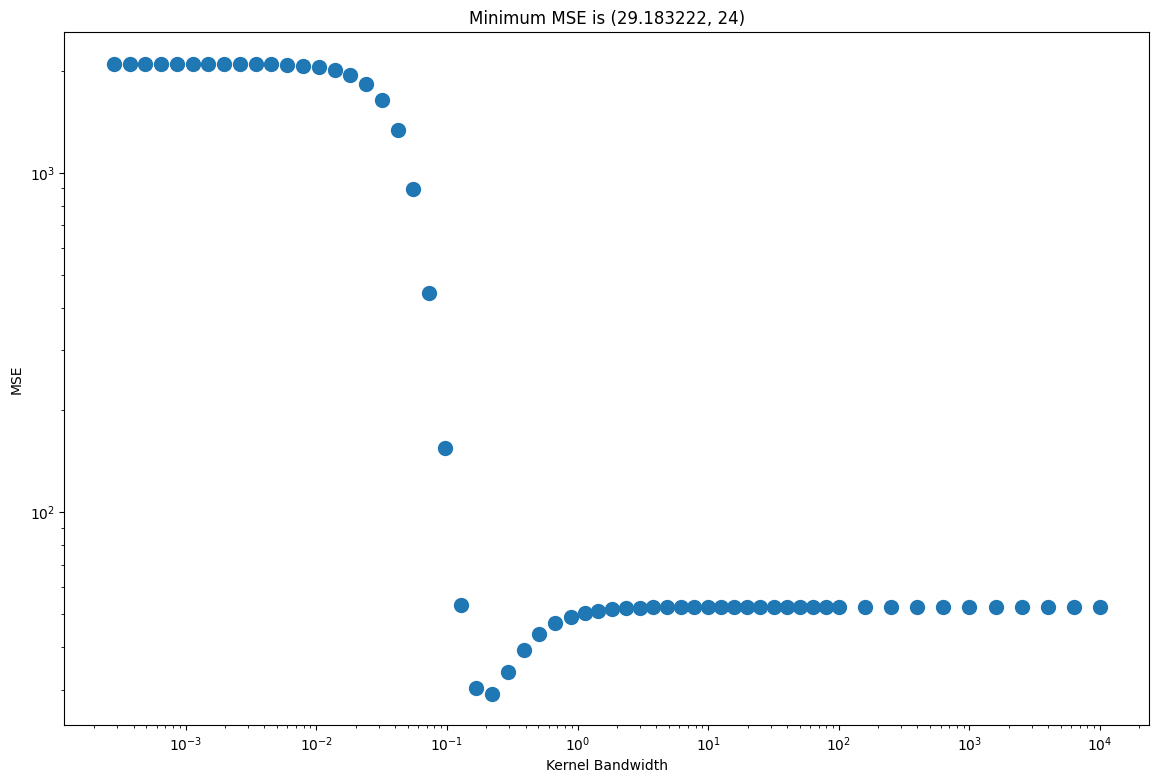

In [8]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")